Monthly Income: 50,000.00
Total Income: 650,000.00
Taxable Income: 433,333.33
Total Tax: 5,000.00
Effective Tax (after rebate): 0.00
Monthly Income After Tax: 50,000.00
Rebate Amount: 13,000.00


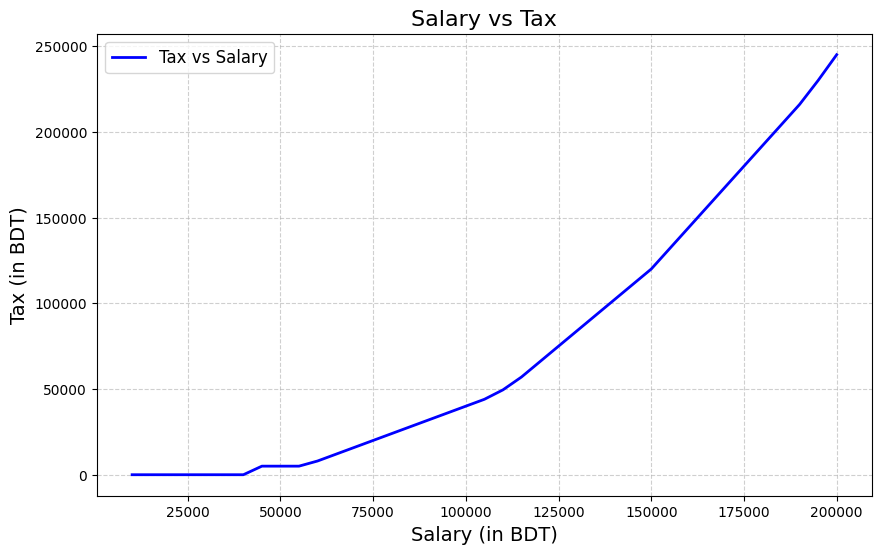

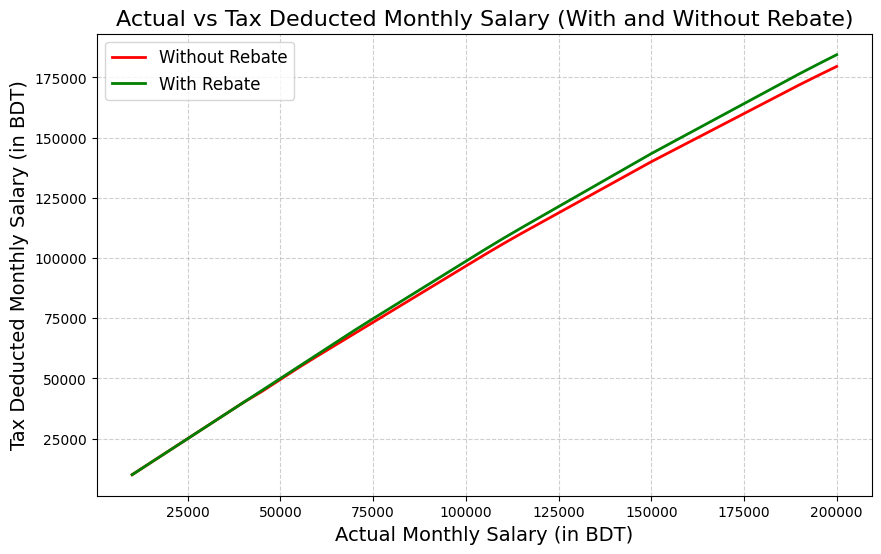

In [8]:
import matplotlib.pyplot as plt

# Configurable variables for tax slabs and percentages
SLABS = [
    (0, 0),          # First slab: tax-free
    (100000, 0.05),  # Next 100k taxed at 5%
    (400000, 0.10),  # Next 400k taxed at 10%
    (500000, 0.15),  # Next 500k taxed at 15%
    (500000, 0.20),  # Next 500k taxed at 20%
    (2000000, 0.25), # Next 2000k taxed at 25%
    (float("inf"), 0.30) # Remaining taxed at 30%
]
INITIAL_SLAB_MAN = 350000  # Tax-free threshold for men
INITIAL_SLAB_WOMAN = 400000  # Tax-free threshold for women
MINIMUM_TAX = 5000          # Minimum income tax (if tax > 0 but < 5000)

REBATE_MAX = 1000000  # Maximum rebate amount
REBATE_PERCENTAGE = 0.15  # Investment rebate percentage
REBATE_TAXABLE_PERCENTAGE = 0.03  # 3% of taxable income

# Function to calculate total annual income
def calculate_annual_income(monthly_salary, gender, bonus_count=0, custom_bonus=None):
    bonus = custom_bonus if custom_bonus is not None else monthly_salary * bonus_count
    total_income = monthly_salary * 12 + bonus
    deductible = min(total_income / 3, 450000)
    taxable_income = max(0, total_income - deductible)
    return total_income, taxable_income

# Function to calculate total tax with a minimum threshold
def calculate_tax(taxable_income, gender):
    initial_slab = INITIAL_SLAB_WOMAN if gender == "woman" else INITIAL_SLAB_MAN
    tax = 0
    remaining_income = taxable_income

    # Deduct initial slab (tax-free)
    if remaining_income > initial_slab:
        remaining_income -= initial_slab
    else:
        return tax  # No tax if income is below the initial slab

    # Apply tax slabs
    for slab_limit, percentage in SLABS:
        if remaining_income <= slab_limit:
            tax += remaining_income * percentage
            break
        else:
            tax += slab_limit * percentage
            remaining_income -= slab_limit

    # Enforce minimum tax rule (if tax > 0 but < MINIMUM_TAX)
    if 0 < tax < MINIMUM_TAX:
        tax = MINIMUM_TAX

    return tax

# Function to calculate tax rebate
def calculate_rebate(taxable_income, total_tax, use_max_rebate=False, custom_investment=None):
    if use_max_rebate:
        total_investment = (taxable_income * REBATE_TAXABLE_PERCENTAGE) / REBATE_PERCENTAGE
    else:
        total_investment = custom_investment or 0

    # Calculate allowable rebate
    allowable_rebate = min(
        taxable_income * REBATE_TAXABLE_PERCENTAGE,
        total_investment * REBATE_PERCENTAGE,
        REBATE_MAX
    )
    effective_tax = max(0, total_tax - allowable_rebate)
    return effective_tax, allowable_rebate

# Wrapper function to get tax and post-tax monthly income
def get_tax_summary(monthly_salary, gender, bonus_count=0, custom_bonus=None, use_max_rebate=False, custom_investment=None):
    total_income, taxable_income = calculate_annual_income(monthly_salary, gender, bonus_count, custom_bonus)
    total_tax = calculate_tax(taxable_income, gender)

    # Rebate calculation
    effective_tax, rebate_amount = calculate_rebate(taxable_income, total_tax, use_max_rebate, custom_investment)
    monthly_income_after_tax = monthly_salary - (effective_tax / 12)

    return {
        "Monthly Income": monthly_salary,
        "Total Income": total_income,
        "Taxable Income": taxable_income,
        "Total Tax": total_tax,
        "Effective Tax (after rebate)": effective_tax,
        "Monthly Income After Tax": monthly_income_after_tax,
        "Rebate Amount": rebate_amount
    }

# Example usage
if __name__ == "__main__":
    monthly_salary = 50_000   # Example salary
    gender = "man"            # Gender: "man" or "woman"
    bonus_count = 1           # Number of full bonuses
    custom_bonus = None       # Custom bonus amount (if applicable)
    use_max_rebate = True     # Whether to calculate with maximum rebate
    custom_investment = None  # Custom investment (if applicable)

    # Get the tax summary
    summary = get_tax_summary(monthly_salary, gender, bonus_count, custom_bonus, use_max_rebate, custom_investment)

    # Print results
    for key, value in summary.items():
        print(f"{key}: {value:,.2f}")

    # Plotting Salary vs Tax
    salaries = range(10000, 200001, 5000)  # Example salary range
    taxes = [get_tax_summary(s, gender)["Total Tax"] for s in salaries]

    plt.figure(figsize=(10, 6))
    plt.plot(salaries, taxes, label="Tax vs Salary", color="blue", linewidth=2)
    plt.title("Salary vs Tax", fontsize=16)
    plt.xlabel("Salary (in BDT)", fontsize=14)
    plt.ylabel("Tax (in BDT)", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(fontsize=12)
    plt.show()

    # Plotting Monthly Salary After Tax With and Without Rebate
    without_rebate = [
        get_tax_summary(salary, "man", use_max_rebate=False)["Monthly Income After Tax"]
        for salary in salaries
    ]
    with_rebate = [
        get_tax_summary(salary, "man", use_max_rebate=True)["Monthly Income After Tax"]
        for salary in salaries
    ]

    plt.figure(figsize=(10, 6))
    plt.plot(salaries, without_rebate, label="Without Rebate", color="red", linewidth=2)
    plt.plot(salaries, with_rebate, label="With Rebate", color="green", linewidth=2)
    plt.title("Actual vs Tax Deducted Monthly Salary (With and Without Rebate)", fontsize=16)
    plt.xlabel("Actual Monthly Salary (in BDT)", fontsize=14)
    plt.ylabel("Tax Deducted Monthly Salary (in BDT)", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(fontsize=12)
    plt.show()